ASSIGNMENT-4                                                                   
COMPUTATIONAL PHYSICS

In [2]:
import numpy as np
import matplotlib.pyplot as plt

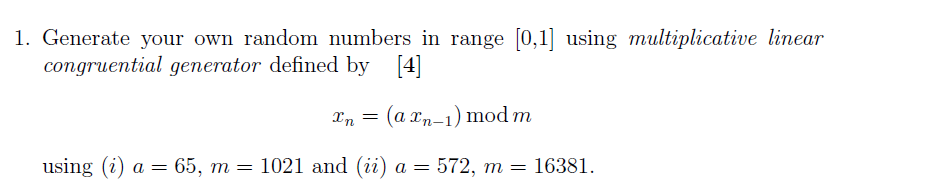

In [16]:
#define the function
def mlcg(seed, a, m, n):
    x = seed
    results = []
    for _ in range(n):
        x = (a * x) % m
        results.append(x/m)
    return results

In [23]:
#for a = 65
a_65 = mlcg(100, 65, 1021, 10)
print(a_65)

[0.366307541625857, 0.8099902056807052, 0.6493633692458374, 0.20861900097943192, 0.5602350636630754, 0.4152791380999021, 0.9931439764936337, 0.55435847208619, 0.03330068560235064, 0.16454456415279137]


In [24]:
#for a =572
a_572 = mlcg(100, 572, 16381, 10)
print(a_572)

[0.491850314388621, 0.338379830291191, 0.55326292656126, 0.4663939930407179, 0.7773640192906416, 0.6522190342469935, 0.06928758928026373, 0.632501068310848, 0.790611073805018, 0.22953421647030095]


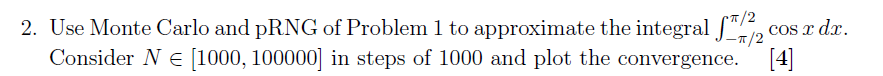

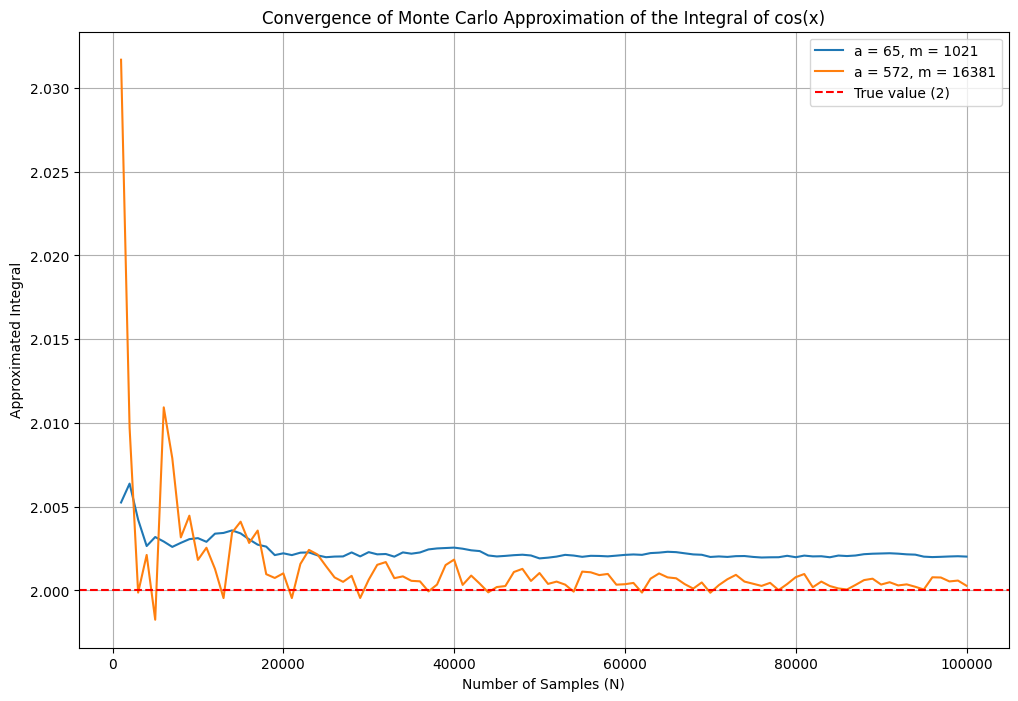

In [34]:
def Monte_Carlo_Cos_Integral_mlcp(seed,a, m, N, step_size):
    seed = 1
    results = []
    N_values = list(range(1000, N + 1, step_size))

    for N in N_values:
        x = seed
        sum_cos = 0
        for _ in range(N):
            x = (a * x) % m
            x_scaled = (x / m) * np.pi - np.pi / 2  
            sum_cos += np.cos(x_scaled)
        integral_approx = (np.pi) * sum_cos / N
        results.append(integral_approx)
    
    return N_values, results

N = 100000
step_size = 1000
seed=100
# Using both sets of parameters
N_values, integral_set_65 = Monte_Carlo_Cos_Integral_mlcp(seed,a=65, m=1021, N=N, step_size=step_size)
_, integral_set_572 = Monte_Carlo_Cos_Integral_mlcp(seed,a=572, m=16381, N=N, step_size=step_size)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(N_values, integral_set_65, label='a = 65, m = 1021')
plt.plot(N_values, integral_set_572, label='a = 572, m = 16381')
plt.axhline(y=2, color='r', linestyle='--', label='True value (2)')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Approximated Integral')
plt.title('Convergence of Monte Carlo Approximation of the Integral of cos(x)')
plt.legend()
plt.grid(True)
plt.show()

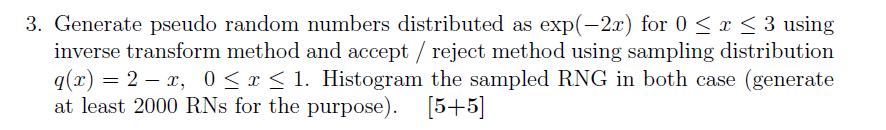

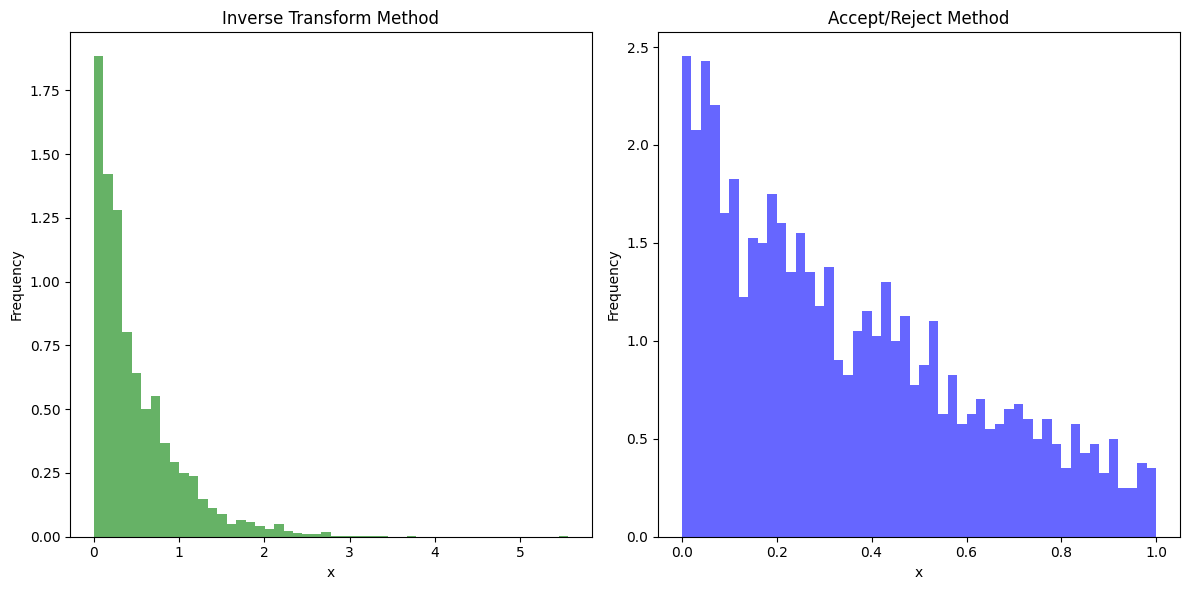

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution and its inverse CDF
def p(x):
    return np.exp(-2 * x)

def inverse_cdf_p(y):
    return -0.5 * np.log(1 - y)

# Define the sampling distribution and its maximum value
def q(x):
    return 2 - x

max_q = 2

# Number of random numbers to generate
N = 2000

# Inverse transform method
U = np.random.uniform(0, 1, N)
X_inverse_transform = inverse_cdf_p(U)

# Accept/reject method
X_accept_reject = []
while len(X_accept_reject) < N:
    U1 = np.random.uniform(0, 1)
    U2 = np.random.uniform(0, max_q)
    X = U1
    if U2 <= p(X) / max_q:
        X_accept_reject.append(X)
X_accept_reject = np.array(X_accept_reject)

# Histogram the sampled random numbers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(X_inverse_transform, bins=50, density=True, alpha=0.6, color='g')
plt.title('Inverse Transform Method')
plt.xlabel('x')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(X_accept_reject, bins=50, density=True, alpha=0.6, color='b')
plt.title('Accept/Reject Method')
plt.xlabel('x')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

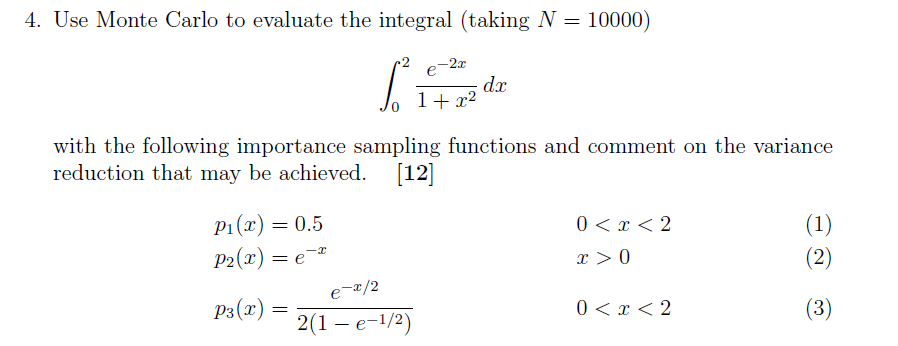

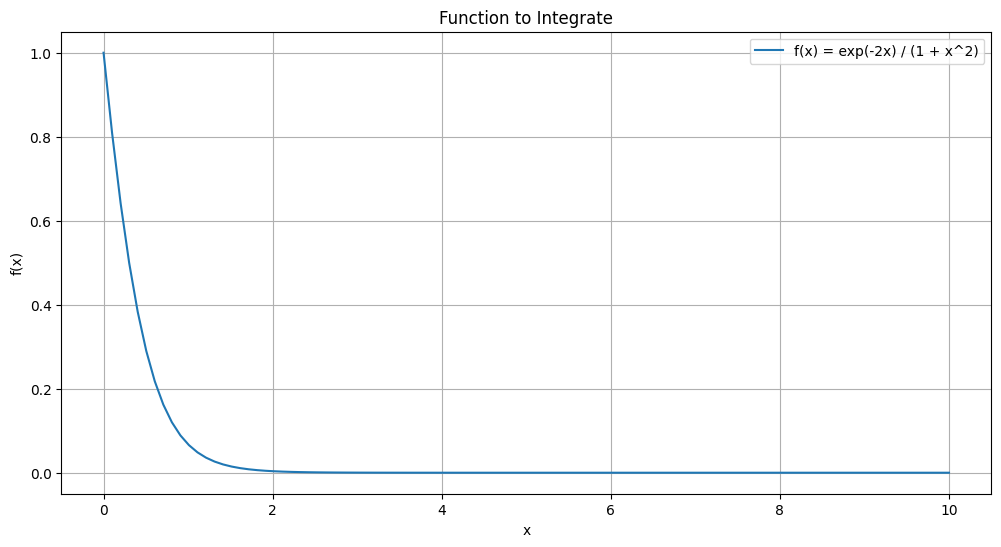

In [3]:

# Define the function to integrate
def f(x):
    return np.exp(-2 * x) / (1 + x**2)

#plotting the function
x = np.linspace(0, 10, 100)
y = f(x)
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='f(x) = exp(-2x) / (1 + x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function to Integrate')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

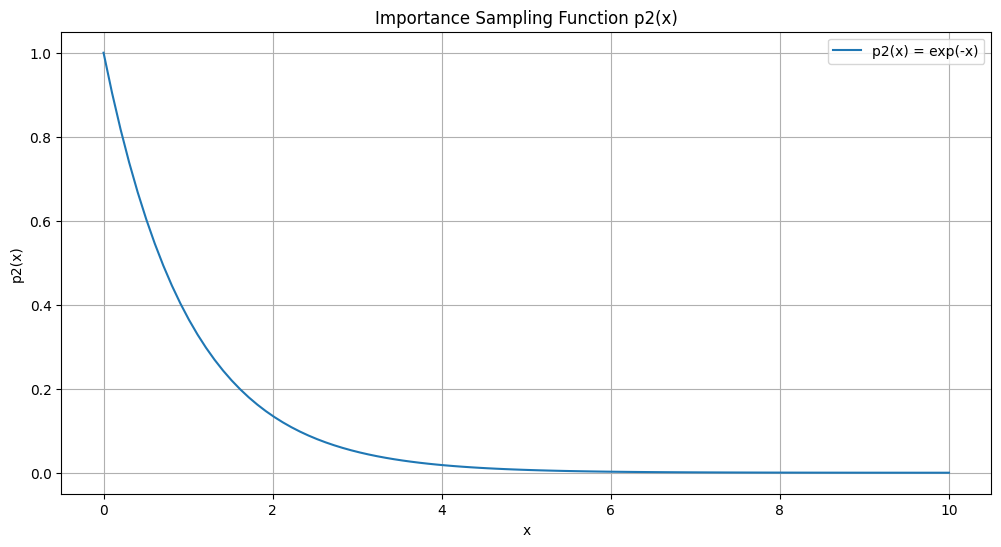

<Figure size 640x480 with 0 Axes>

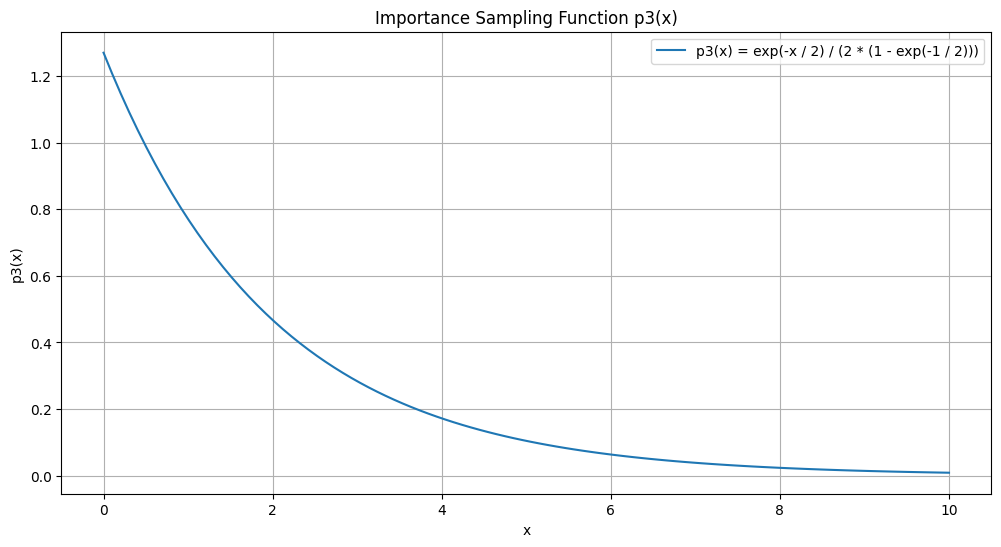

p1: mean = 0.4021459364542371, variance = 0.2753633693761782
p2: mean = 0.39914780524906096, variance = 0.10567713904099871
p3: mean = 0.372583563521599, variance = 0.04302797982825345


In [5]:


# Define the importance sampling functions and their inverse CDFs
def p1(x):
    return 0.5

def inverse_cdf_p1(y):
    return 2 * y

def p2(x):
    return np.exp(-x)

#plot p2(x)
x = np.linspace(0, 10, 100)
y = p2(x)
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='p2(x) = exp(-x)')
plt.xlabel('x')
plt.ylabel('p2(x)')
plt.title('Importance Sampling Function p2(x)')
plt.legend()
plt.grid(True)
plt.show()


def inverse_cdf_p2(y):
    return -np.log(1 - y)

def p3(x):
    return np.exp(-x / 2) / (2 * (1 - np.exp(-1 / 2)))

#plot p3(x)
x = np.linspace(0, 10, 100)
y = p3(x)
plt.figure(2)
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='p3(x) = exp(-x / 2) / (2 * (1 - exp(-1 / 2)))')
plt.xlabel('x')
plt.ylabel('p3(x)')
plt.title('Importance Sampling Function p3(x)')
plt.legend()
plt.grid(True)
plt.show()



def inverse_cdf_p3(y):
    return -2 * np.log(1 - y * (1 - np.exp(-1 / 2)))

# Number of samples
N = 10000

# Monte Carlo integration with importance sampling
def monte_carlo_importance_sampling(f, p, inverse_cdf_p, N):
    U = np.random.uniform(0, 1, N)
    X = inverse_cdf_p(U)
    Y = f(X) / p(X)
    return np.mean(Y), np.var(Y)

# Perform the Monte Carlo integration for each importance sampling function
mean_p1, var_p1 = monte_carlo_importance_sampling(f, p1, inverse_cdf_p1, N)
mean_p2, var_p2 = monte_carlo_importance_sampling(f, p2, inverse_cdf_p2, N)
mean_p3, var_p3 = monte_carlo_importance_sampling(f, p3, inverse_cdf_p3, N)

# Print the results
print(f"p1: mean = {mean_p1}, variance = {var_p1}")
print(f"p2: mean = {mean_p2}, variance = {var_p2}")
print(f"p3: mean = {mean_p3}, variance = {var_p3}")

Explanation :
How much the variance decreases with importance sampling depends on how well the sampling function matches the function we're integrating. The closer they match, the more the variance decreases. So, p3(x) is expected to reduce the variance the most because it's the closest match to f(x) compared to p1(x) and p2(x).